# Plotting Tips and Best Practices

A good plot should be clear and precise. The tips listed below refer to the Python plotting packages matplotlib, seaborn, and gpplot. For an introduction to visualization in Python, please visit the [Visualization module](https://github.com/broadinstitute/computational-resources/blob/main/02_Data_Analysis_with_Python/02_Visualization/Visualization_Packages.ipynb) in computational-resources on GitHub.

The data set for these examples are from Yanjing's CRISPRa data, from PoolQ run YVL_GPP3537_A549_CP0052_notsplit and pDNA from YVL_GPP3538_HCT116_CP0052_notsplit.

In [1]:
import pandas as pd
from poola import core as pool
import matplotlib.pyplot as plt
import seaborn as sns
import gpplot as gpp

In [2]:
A549_reads = pd.read_table('Data/counts-YVL_GPP3537_A549_CP0052_notsplit.txt')
HCT116_reads = pd.read_table('Data/counts-YVL_GPP3538_HCT116_CP0052_notsplit.txt')
pDNA_reads = HCT116_reads[['Construct Barcode', 'pDNA']]
# drop empty column
A549_reads = A549_reads.copy().drop(['Construct IDs', 'Empty'], axis=1)
A549_reads = pd.merge(A549_reads, pDNA_reads, on = 'Construct Barcode')

# Calculate lognorms
reads_cols = A549_reads.columns[1:]
A549_lognorms = pool.lognorm_columns(reads_df = A549_reads, columns = reads_cols)

# Calculate log-fold changes relative to pDNA
target_cols = [col for col in A549_lognorms.columns if 'A549' in col]
A549_lfcs = pool.calculate_lfcs(lognorm_df = A549_lognorms, ref_col = 'pDNA', target_cols = target_cols)
A549_lfcs

,Construct Barcode,A549;XPR_109;CP0052;D21;RepA;Dropout,A549;XPR_109;CP0052;D21;RepB;Dropout,A549;XPR_109;CP0052;D21;RepA;Nutlin-3,A549;XPR_109;CP0052;D21;RepB;Nutlin-3,A549;XPR_109;CP0052;D21;RepA;Trametinib,A549;XPR_109;CP0052;D21;RepA;Rotenone,A549;XPR_109;CP0052;D21;RepB;Rotenone,A549;XPR_109;CP0052;D21;RepB;Trametinib
0,AAAAAAAAAAAGCACTCTGT,2.801397,2.920505,2.531807,2.989453,1.346783,2.696709,2.965739,0.000000
1,AAAAAAAAAAGCAGTGGGAG,3.813169,3.608355,3.613525,3.395259,3.681794,3.218077,3.330785,3.451907
2,AAAAAAAAAAGGTCATTCAG,3.271536,3.467130,2.898593,3.309130,0.598824,3.314775,3.255115,4.692480
3,AAAAAAAAAATGTCAGAAGC,3.413688,3.556615,3.773451,3.246340,3.206596,3.127800,3.487792,0.000000
4,AAAAAAAAACAGGTCACCCA,4.113827,4.003398,3.991579,3.716775,2.735369,3.702069,3.568159,1.409869
...,...,...,...,...,...,...,...,...,...
56757,TTTGTTTGCTTCGAGGACGA,3.958117,4.358336,4.279054,4.400650,5.268925,4.493755,4.217931,4.596924
56758,TTTTACCTTGTTCACATGGA,-2.614317,-2.734671,-2.660631,-2.345837,-3.840164,-2.605719,-2.520350,-2.506735
56759,TTTTGACTCTAATCACCGGT,-1.858566,-2.085683,-1.404534,-2.170627,-1.387927,-1.980965,-2.160022,-0.746771
56760,TTTTTAATACAAGGTAATCT,3.936743,3.611342,3.870998,3.476534,0.000000,3.693103,3.312237,6.072217


## Label axes, titles, and points meaningfully 

For presentations and manuscripts, axes should only include relevant information and include units when necessary.

**Replicate Correlations Example**

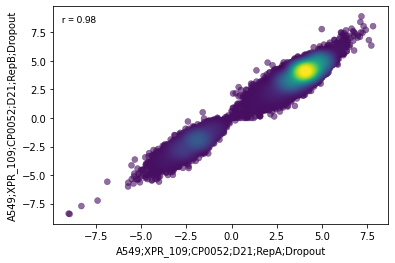

In [3]:
fig, ax = plt.subplots()
g = gpp.point_densityplot(data=A549_lfcs, x='A549;XPR_109;CP0052;D21;RepA;Dropout', 
                          y='A549;XPR_109;CP0052;D21;RepB;Dropout')
g = gpp.add_correlation(data=A549_lfcs, x='A549;XPR_109;CP0052;D21;RepA;Dropout', 
                          y='A549;XPR_109;CP0052;D21;RepB;Dropout')



In this case, the full column name isn't necessary for understanding the plot, and extraneous information can cause confusion, so we can rename the axes and add a title. If we were presenting this plot within the group, labeling the units as log-fold changes may not be necessary because that's the norm for replicate correlations, but it may be useful to include somewhere on the plot in a different setting.

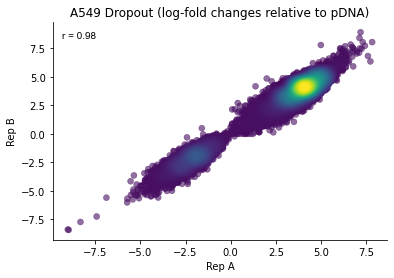

In [4]:
fig, ax = plt.subplots()
g = gpp.point_densityplot(data=A549_lfcs, x='A549;XPR_109;CP0052;D21;RepA;Dropout', 
                          y='A549;XPR_109;CP0052;D21;RepB;Dropout')
g = gpp.add_correlation(data=A549_lfcs, x='A549;XPR_109;CP0052;D21;RepA;Dropout', 
                          y='A549;XPR_109;CP0052;D21;RepB;Dropout')
g = plt.xlabel('Rep A')
g = plt.ylabel('Rep B')
g = plt.title('A549 Dropout (log-fold changes relative to pDNA)')
sns.despine() # this function gets rid of the non-axis lines (i.e., spine) (optional)


Labels are especially important when using subplots.

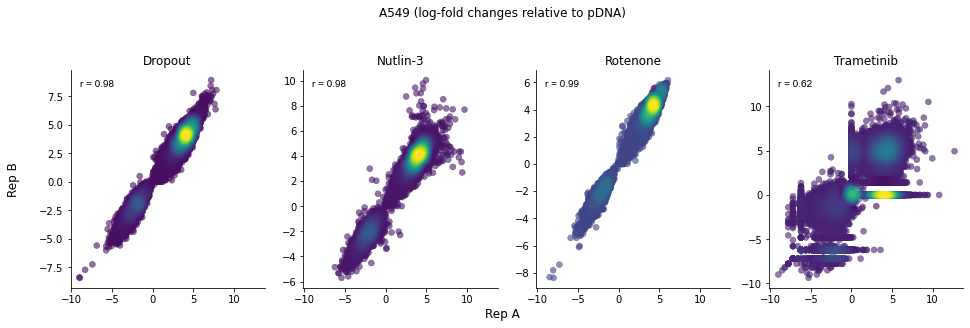

In [5]:
# Store conditions in list from column name
conditions = sorted(list(set([col.split(';')[-1] for col in A549_lfcs.columns if ';' in col])))

fig, axs = plt.subplots(figsize=(16, 4), nrows = 1, ncols = len(conditions), sharex = True, sharey = False)
for i, condition in enumerate(conditions):
    reps = [col for col in A549_lfcs.columns if condition in col]
    g = gpp.point_densityplot(data=A549_lfcs, x=reps[0], y=reps[1], ax = axs[i])
    g = gpp.add_correlation(data=A549_lfcs, x=reps[0], y=reps[1], ax = axs[i])
    g = axs[i].set_xlabel('') # prevent column name from being set as label
    g = axs[i].set_ylabel('') # prevent column name from being set as label
    g = axs[i].set_title(condition)
    sns.despine()

g = fig.suptitle('A549 (log-fold changes relative to pDNA)', y = 1.1)
g = fig.supxlabel('Rep A')
g = fig.supylabel('Rep B', x = 0.07)
gpp.savefig('A549_replicates_all_drugs.png')


Note that the scales are different in the axes in some cases (Dropout, Rotenone). We can add the following line of code to make the scales the same. 

```python
set_aspect('equal', 'box')
```

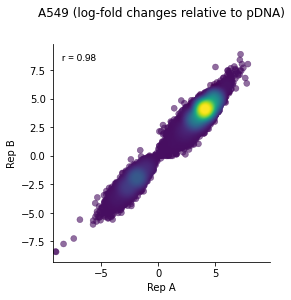

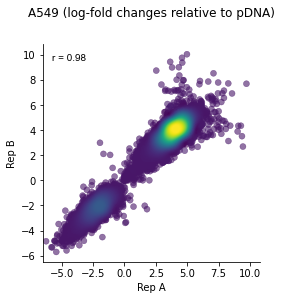

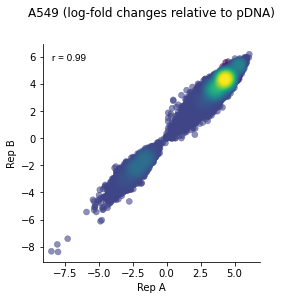

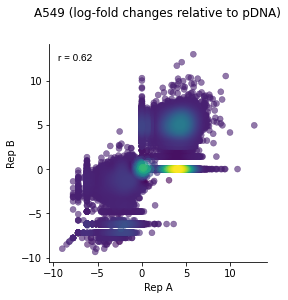

In [6]:
# Store conditions in list from column name
conditions = sorted(list(set([col.split(';')[-1] for col in A549_lfcs.columns if ';' in col])))

for i, condition in enumerate(conditions):
    fig,ax = plt.subplots()
    reps = [col for col in A549_lfcs.columns if condition in col]
    g = gpp.point_densityplot(data=A549_lfcs, x=reps[0], y=reps[1], ax = ax)
    g = gpp.add_correlation(data=A549_lfcs, x=reps[0], y=reps[1], ax = ax)
    g = ax.set_xlabel('') # prevent column name from being set as label
    g = ax.set_ylabel('') # prevent column name from being set as label
    g = ax.set_title(condition)
    
    # Set scales to be the same
    ax.set_aspect('equal','box')
    ax.set_xlim(ax.get_ylim())

    sns.despine()

    g = plt.title('A549 (log-fold changes relative to pDNA)', y = 1.1)
    g = plt.xlabel('Rep A')
    g = plt.ylabel('Rep B', x = 0.07)
    gpp.savefig(condition + '_replicate_correlations.png')


It may be useful to annotate specific points on the plot, usually when plotting gene-level data, but be careful to only annotate a handful otherwise the plot will become cluttered. There are a few functions you can use to do so.

In [8]:
# Average log-fold changes across replicates

A549_avg_lfcs_vertical = pool.average_replicate_lfcs(lfcs=A549_lfcs, guide_col='Construct Barcode', 
                                           condition_indices=[-1], sep = ';')
A549_avg_lfcs = pd.DataFrame()
# Reformat averaged log-fold change df
A549_avg_lfcs = A549_avg_lfcs_vertical.pivot(index='Construct Barcode', 
                                                      columns = 'condition', 
                                                      values = 'avg_lfc').reset_index()
A549_avg_lfcs = A549_avg_lfcs.rename_axis(None, axis=1)

# Merge guide-level lfc df with gene annotations
gene_annotations = pd.read_csv('Data/CP0052_GRCh38_NCBI_strict_gene_20220324.csv')
A549_gene_lfcs = pd.merge(A549_avg_lfcs, gene_annotations, left_on = 'Construct Barcode', 
                          right_on = 'Barcode Sequence').drop(['Barcode Sequence', 'Gene ID'], axis = 1)
# Average log-fold changes across guides at gene-level
A549_gene_avg_lfcs = A549_gene_lfcs.groupby('Gene Symbol', as_index = False).agg('mean',numeric_only=True)
A549_gene_avg_lfcs


,Gene Symbol,Dropout,Nutlin-3,Rotenone,Trametinib
0,A1BG-AS1,3.843200,4.018893,4.052969,3.443799
1,A1CF,1.761341,1.770546,1.966018,0.590459
2,A2M,3.938395,3.965267,3.934927,2.116855
3,A2ML1,4.358348,4.183689,4.223252,4.017817
4,A3GALT2,4.129155,4.180732,4.181705,2.409914
...,...,...,...,...,...
25703,ZXDC,4.235267,4.128162,4.209560,1.666633
25704,ZYG11A,1.533613,1.602991,1.502945,1.257580
25705,ZYG11B,2.716448,2.534588,2.654190,2.296278
25706,ZYX,3.276423,3.529518,3.747203,1.061356


**gpplot label_points()**

<AxesSubplot:title={'center':'Gene-level log-fold changes'}, xlabel='Nutlin-3', ylabel='Rotenone'>

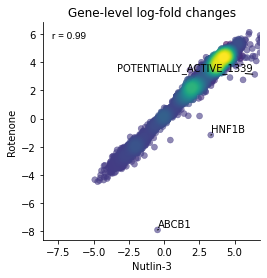

In [9]:
fig, ax = plt.subplots()
g = gpp.point_densityplot(data=A549_gene_avg_lfcs, x='Nutlin-3', 
                          y='Rotenone')
g = gpp.add_correlation(data=A549_gene_avg_lfcs, x='Nutlin-3', 
                          y='Rotenone')

sns.despine() # this function gets rid of the non-axis lines (i.e., spine) (optional)
# Set scales to be the same
ax.set_aspect('equal','box')
ax.set_xlim(ax.get_ylim())
ax.set_title('Gene-level log-fold changes')

A549_gene_avg_lfcs['Rotenone - Nutlin residual'] = (A549_gene_avg_lfcs['Rotenone'].copy() - 
                                                    A549_gene_avg_lfcs['Nutlin-3'].copy())

# Subset dataframe with points to be labeled
annot_df = A549_gene_avg_lfcs.nsmallest(3, 'Rotenone - Nutlin residual')
annot_genes = annot_df['Gene Symbol'].to_list()
gpp.label_points(data=annot_df, x='Nutlin-3',y='Rotenone', label = annot_genes, label_col = 'Gene Symbol')



**matplotlib text**

Adding text to the plot using a for loop involves more lines of code but offers more flexibility with the placement and formatting of teh annotations. In many cases, it may be easier to just adjust the text formatting in Adobe Illustrator.

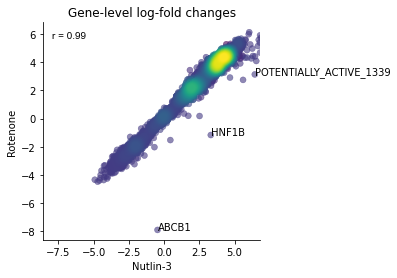

In [10]:
fig, ax = plt.subplots()
g = gpp.point_densityplot(data=A549_gene_avg_lfcs, x='Nutlin-3', 
                          y='Rotenone')
g = gpp.add_correlation(data=A549_gene_avg_lfcs, x='Nutlin-3', 
                          y='Rotenone')

sns.despine() # this function gets rid of the non-axis lines (i.e., spine) (optional)
# Set scales to be the same
ax.set_aspect('equal','box')
ax.set_xlim(ax.get_ylim())
ax.set_title('Gene-level log-fold changes')

A549_gene_avg_lfcs['Rotenone - Nutlin residual'] = (A549_gene_avg_lfcs['Rotenone'].copy() - 
                                                    A549_gene_avg_lfcs['Nutlin-3'].copy())

# Subset dataframe with points to be labeled
annot_df = A549_gene_avg_lfcs.nsmallest(3, 'Rotenone - Nutlin residual')
annot_genes = annot_df['Gene Symbol'].to_list()
texts=[]
for i, row in annot_df.iterrows():
    texts.append(plt.text(row['Nutlin-3'], row['Rotenone'], row['Gene Symbol'], 
                                          color = 'black'))
# gpp.label_points(data=annot_df, x='Nutlin-3',y='Rotenone', label = annot_genes, label_col = 'Gene Symbol')



## Use colors thoughtfully and add legends

Since plots try to convey information in a limited space, every element needs to be meaningful, including colors. It is important to choose [color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html) appropriate for plot.

**Continuous palette: Viridis**

For point density plots we use a continuous palette called viridis that makes the regions with a high density of points on the plot easy to see. 

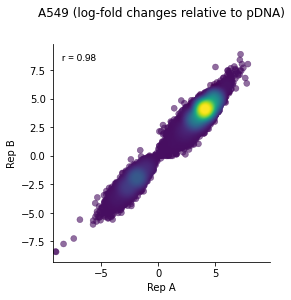

In [11]:
condition = 'Dropout'
fig,ax = plt.subplots()
reps = [col for col in A549_lfcs.columns if condition in col]
g = gpp.point_densityplot(data=A549_lfcs, x=reps[0], y=reps[1], ax = ax)
g = gpp.add_correlation(data=A549_lfcs, x=reps[0], y=reps[1], ax = ax)
g = ax.set_xlabel('') # prevent column name from being set as label
g = ax.set_ylabel('') # prevent column name from being set as label
g = ax.set_title(condition)

# Set scales to be the same
ax.set_aspect('equal','box')
ax.set_xlim(ax.get_ylim())

sns.despine()

g = plt.title('A549 (log-fold changes relative to pDNA)', y = 1.1)
g = plt.xlabel('Rep A')
g = plt.ylabel('Rep B', x = 0.07)

**Discrete palette: Set 2**

We often use the Set 2 palette from Seaborn as a discrete color palette because of the distinct colors and because it is color-blind friendly. 

Supplementary Figure 1B from Hanna et al. 2020
<img src="2022_09_27_PlottingTips/BaseEditor_Hannaetal_S1B.png" width="400"/>

## Make sure plots are readable in their context

When displaying plots, all of the components should be easy to read. Adjust the size of plots, fonts, and points as well as the resolution of the figure so that they are clearly visible in the context of the plot (Jupyter notebook, poster, slides, etc.).

### gpplot: [set_aesthetics()](https://gpplot.readthedocs.io/en/latest/_modules/gpplot/style.html#set_aesthetics)

This function sets aesthetics for plotting, using seaborn.set_style (e.g., sets default color palette to Set 2) and matplotlib.rcParams (e.g., such that when a figure is saved as a pdf it can be edited in Adobe Illustrator).

### Seaborn: [set_context()](https://seaborn.pydata.org/generated/seaborn.set_context.html)

This function takes in a context parameter (paper, notebook, talk, poster) which configures plotting parameters such as font size for axes and titles.

#### poster

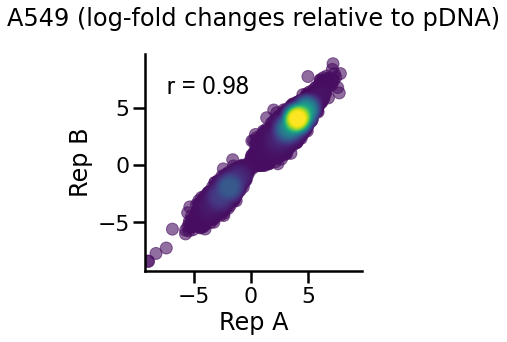

In [12]:
sns.set_context('poster')
condition = 'Dropout'
fig,ax = plt.subplots()
reps = [col for col in A549_lfcs.columns if condition in col]
g = gpp.point_densityplot(data=A549_lfcs, x=reps[0], y=reps[1], ax = ax)
g = gpp.add_correlation(data=A549_lfcs, x=reps[0], y=reps[1], ax = ax)
g = ax.set_xlabel('') # prevent column name from being set as label
g = ax.set_ylabel('') # prevent column name from being set as label
g = ax.set_title(condition)

# Set scales to be the same
ax.set_aspect('equal','box')
ax.set_xlim(ax.get_ylim())

sns.despine()

g = plt.title('A549 (log-fold changes relative to pDNA)', y = 1.1)
g = plt.xlabel('Rep A')
g = plt.ylabel('Rep B', x = 0.07)

#### talk

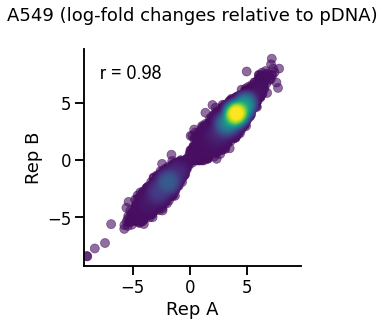

In [13]:
sns.set_context('talk')
condition = 'Dropout'
fig,ax = plt.subplots()
reps = [col for col in A549_lfcs.columns if condition in col]
g = gpp.point_densityplot(data=A549_lfcs, x=reps[0], y=reps[1], ax = ax)
g = gpp.add_correlation(data=A549_lfcs, x=reps[0], y=reps[1], ax = ax)
g = ax.set_xlabel('') # prevent column name from being set as label
g = ax.set_ylabel('') # prevent column name from being set as label
g = ax.set_title(condition)

# Set scales to be the same
ax.set_aspect('equal','box')
ax.set_xlim(ax.get_ylim())

sns.despine()

g = plt.title('A549 (log-fold changes relative to pDNA)', y = 1.1)
g = plt.xlabel('Rep A')
g = plt.ylabel('Rep B', x = 0.07)

### Colors, transparency, edge colors

Light colors can be difficult to see on projected slides, so adjust the shades of colors used. Partially transparent markers can also be difficult to see on projected slides, which can be adjusted with the alpha parameter.

#### alpha = 0.3

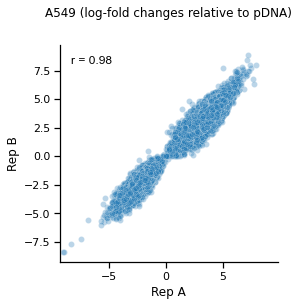

In [14]:
sns.set_context('notebook')
condition = 'Dropout'
fig,ax = plt.subplots()
reps = [col for col in A549_lfcs.columns if condition in col]
g = sns.scatterplot(data=A549_lfcs, x=reps[0], y=reps[1], ax = ax, alpha = 0.3)
g = gpp.add_correlation(data=A549_lfcs, x=reps[0], y=reps[1], ax = ax)
g = ax.set_xlabel('') # prevent column name from being set as label
g = ax.set_ylabel('') # prevent column name from being set as label
g = ax.set_title(condition)

# Set scales to be the same
ax.set_aspect('equal','box')
ax.set_xlim(ax.get_ylim())

sns.despine()

g = plt.title('A549 (log-fold changes relative to pDNA)', y = 1.1)
g = plt.xlabel('Rep A')
g = plt.ylabel('Rep B', x = 0.07)

#### alpha = 0.7

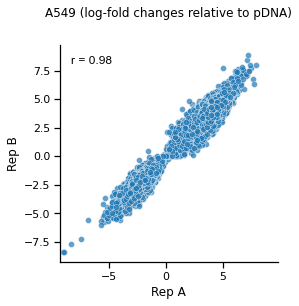

In [15]:
sns.set_context('notebook')
condition = 'Dropout'
fig,ax = plt.subplots()
reps = [col for col in A549_lfcs.columns if condition in col]
g = sns.scatterplot(data=A549_lfcs, x=reps[0], y=reps[1], ax = ax, alpha = 0.7)
g = gpp.add_correlation(data=A549_lfcs, x=reps[0], y=reps[1], ax = ax)
g = ax.set_xlabel('') # prevent column name from being set as label
g = ax.set_ylabel('') # prevent column name from being set as label
g = ax.set_title(condition)
#     plt.axis('square')
# Set scales to be the same
ax.set_aspect('equal','box')
ax.set_xlim(ax.get_ylim())

sns.despine()

g = plt.title('A549 (log-fold changes relative to pDNA)', y = 1.1)
g = plt.xlabel('Rep A')
g = plt.ylabel('Rep B', x = 0.07)

In some cases, if there is a high concentration of overlapping points, the default white edgecolor of the markers can make points hard to see. In this case, you can set the edgecolor parameter to None.

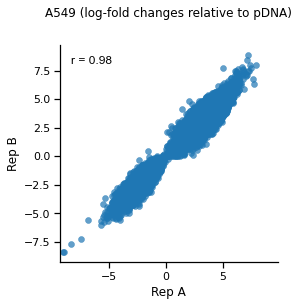

In [16]:
sns.set_context('notebook')
condition = 'Dropout'
fig,ax = plt.subplots()
reps = [col for col in A549_lfcs.columns if condition in col]
g = sns.scatterplot(data=A549_lfcs, x=reps[0], y=reps[1], ax = ax, alpha = 0.7, edgecolor = None)
g = gpp.add_correlation(data=A549_lfcs, x=reps[0], y=reps[1], ax = ax)
g = ax.set_xlabel('') # prevent column name from being set as label
g = ax.set_ylabel('') # prevent column name from being set as label
g = ax.set_title(condition)
#     plt.axis('square')
# Set scales to be the same
ax.set_aspect('equal','box')
ax.set_xlim(ax.get_ylim())

sns.despine()

g = plt.title('A549 (log-fold changes relative to pDNA)', y = 1.1)
g = plt.xlabel('Rep A')
g = plt.ylabel('Rep B', x = 0.07)

### Setting image resolution

When saving an image for use in a poster or presentation or manuscript, set the dpi parameter to 300 to save at high resolution so that the image is clear.
```python
gpp.savefig('figure.png', dpi = 300)
```

## Adobe Illustrator

For any further edits (e.g., moving labels) use Adobe Illustrator. For specific details on how to prepare figures for a manuscript, please refer to the [PublicationFigures document](https://docs.google.com/document/d/1-dqYa-Ef8B2a9TlwvntBXwgMedEBlOoCtB0ii84Ss50/edit?usp=sharing). 

To make a figure editable in Adobe Illustrator, use either of the following lines of code:

1. ```gpp.set_aesthetics()```

OR
2. ```python
   import matplotlib 
   matplotlib.rcParams['pdf.fonttype'] = 42
   matplotlib.rcParams['ps.fonttype'] = 42```